<a href="https://colab.research.google.com/github/farheenfathimaa/TensorFlow-DeepLearning/blob/main/00_tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, we're going to cover some of the most fundamental concepts of tensors using TensorFlow
More specifically, we're going to cover:
* Introduction to tensors (creating tensors)
* Getting information from tensors (tensor attributes)
* Manipulating tensors (tensor operations)
* Tensors and NumPy
* Using @tf.function (a way to speed up your regular Python functions)
* Using GPUs with TensorFlow
* Exercises to try

Refer to [link](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/00_tensorflow_fundamentals.ipynb) for more details

## Introduction to Tensors

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# Create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [ ]:
# Create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# Check the dimension of our vector
vector.ndim

1

In [ ]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
# dimension of matrix
matrix.ndim

2

In [ ]:
# Create another matrix
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [8., 9. ]], dtype=tf.float16) # specify the data type
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
# dimension of another_matrix
another_matrix.ndim

2

In [ ]:
# Let's create a tensor
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

What we've created so far:
* **Scalar:** a single number
* **Vector:** a number with direction (e.g. wind speed and direction)
* **Matrix:** a 2-dimensional array of numbers
* **Tensor:** an n-dimensional array of numbers (where n can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector).

### Creating tensors with `tf.Variable`
tf.Variable: [link](https://www.tensorflow.org/api_docs/python/tf/Variable)

In [ ]:
# Create the same tensor with tf.Variable() as above
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Let's try change one of the elements in our changeable tensor
# changeable_tensor[0] = 7
# changeable_tensor

In [ ]:
# How about we use .assign()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
# Let's try to change our unchangeable tensor
# unchangeable_tensor[0].assign(7)
# unchangeable_tensor

🗝️**Note:** Rarely in practice will you need to decide whether to use `tf.constant` or `tf.Variable` to create tensors, as TensorFlow does this for you. However, if in doubt, use tf.constant and change it later if needed.

### Creating random Tensors
Random tensors are tensors of some abitrary size which contain random numbers.

**tf.random.uniform:** *Outputs random values from a uniform distribution.* [link](https://www.tensorflow.org/api_docs/python/tf/random/uniform)

**tf.random.normal:** *Outputs random values from a normal distribution.* [link](https://www.tensorflow.org/api_docs/python/tf/random/normal)

In [ ]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42) # set seed for reproducibility
random_1 = random_1.normal(shape=(3, 2))
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))

# Are they equal?
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### Shuffle the order of elements in a tensor
**tf.random.shuffle:** [link](https://www.tensorflow.org/api_docs/python/tf/random/shuffle)

In [ ]:
# Shuffle a tensor (valuable for when you want to shuffle your data so the inherent order doesn't effect learning)
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
# Gets different results each time
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

In [ ]:
# Shuffle our non-shuffled tensor
tf.random.set_seed(42) # Global level seed
tf.random.shuffle(not_shuffled, seed=42) # Operational level seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

🛠️**Exercise:** Read through TensorFlow documentation on random seed generation: [Link](https://www.tensorflow.org/api_docs/python/tf/random/set_seed) and practice writing 5 random tensors and shuffle them.

It looks like if we want our shuffled tensors to be in the same order, we've got to use the global level random seed as well as the operational level random seed:

> ***Rule 4:*** *If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence.*

In [ ]:
tf.random.set_seed(42)
t1 = tf.random.normal(shape=(3, 2))
t1 = tf.random.shuffle(t1, seed=42)

t2 = tf.random.normal(shape=(3, 2))
t2 = tf.random.shuffle(t2, seed=42)

t3 = tf.random.normal(shape=(3, 1))
t3 = tf.random.shuffle(t3, seed=42)

t4 = tf.random.normal(shape=(2, 2))
t4 = tf.random.shuffle(t4, seed=42)

t5 = tf.random.normal(shape=(3, 3))
t5 = tf.random.shuffle(t5, seed=42)

t1, t2, t3, t4, t5

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 0.3274685, -0.8426258],
        [ 0.3194337, -1.4075519],
        [-2.3880599, -1.0392479]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.49453196,  0.6178192 ],
        [ 0.08422458, -0.86090374],
        [ 0.37812304, -0.00519627]], dtype=float32)>,
 <tf.Tensor: shape=(3, 1), dtype=float32, numpy=
 array([[ 2.3730333 ],
        [-0.55909735],
        [-0.5347214 ]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ 0.33997506, -1.0056272 ],
        [ 0.65648675, -0.4130517 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[ 1.1985261 ,  0.8636208 ,  0.39257562],
        [ 0.93457496, -0.16017465, -2.1050534 ],
        [ 0.00924649, -0.66206276, -0.7410269 ]], dtype=float32)>)

### Other ways to make tensors
Though you might rarely use these (remember, many tensor operations are done behind the scenes for you), you can use `tf.ones()` to create a tensor of all ones and `tf.zeros()` to create a tensor of all zeros.

In [ ]:
# Tensor of all ones
tf.ones([3, 2])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
# Tensor of all zeroes
tf.zeros([3, 2])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

### Turn NumPy arrays in into tensors.

The main difference between tensors and NumPy arrays is that tensors can be run on GPUs (much faster for numerical computing).

 🔑 **Note:** A matrix or tensor is typically represented by a capital letter (e.g. `X` or `A`) where as a vector is typically represented by a lowercase letter (e.g. `y` or `b`).

In [ ]:
# You can also turn NumPy arrays into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # create a NumPy array between 1 and 25
numpy_A
# X = tf.constant(some_matrix) # capital for matrix or tensor
# y = tf.constant(vector) # nop-capital for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [ ]:
A = tf.constant(numpy_A,shape=(2, 3, 4))
B = tf.constant(numpy_A,shape=(3, 8))
C = tf.constant(numpy_A)
A, B, C

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(3, 8), dtype=int32, numpy=
 array([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

## Getting information from tensors (shape, rank, size)

When dealing with tensors you probably want to be aware of the following attributes:
* **Shape:** The length (number of elements) of each of the dimensions of a tensor.
* **Rank:** The number of tensor dimensions. A scalar has rank 0, a vector has rank 1, a matrix is rank 2, a tensor has rank n.
* **Axis or Dimension:** A particular dimension of a tensor.
* **Size:** The total number of items in the tensor.

In [ ]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros([2, 3, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
2*3*4*5

120

In [ ]:
# Get various attributes of tensor
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (2*3*4*5):", tf.size(rank_4_tensor))
print("Total number of elements:", tf.size(rank_4_tensor).numpy()) # .numpy() converts to NumPy array

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along axis 0 of tensor: 2
Elements along last axis of tensor: 5
Total number of elements (2*3*4*5): tf.Tensor(120, shape=(), dtype=int32)
Total number of elements: 120


### Indexing Tensors
Tensors can be indexed just like Python lists.

In [ ]:
# Get the first 2 elements of each dimension
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
# Get the first element from each dimension from each index except for the final one
rank_4_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor[:1, :1, :, :1]

<tf.Tensor: shape=(1, 1, 4, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         [0.]]]], dtype=float32)>

In [ ]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[3, 4],
                            [10, 7]])
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [ ]:
# Get the last item of each row
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 7], dtype=int32)>

In [ ]:
# Add in extra dimension to our rank 2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis] # `...` is the replacement to `:, :,`
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[ 3],
        [ 4]],

       [[10],
        [ 7]]], dtype=int32)>

In [ ]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) # `-1` means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[ 3],
        [ 4]],

       [[10],
        [ 7]]], dtype=int32)>

In [ ]:
tf.expand_dims(rank_2_tensor, axis=0)

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[ 3,  4],
        [10,  7]]], dtype=int32)>

## Manipulating tensors (tensor operations)
**Basic operations**

`+`, `-`, `*`, `/`

In [ ]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7], [3, 4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [ ]:
# Original tensor remains unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [ ]:
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [ ]:
# We can use the built-in tensorflow functions too
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

🗝️**Note:** You can use the equivalent TensorFlow function (where possible) has the advantage of being sped up later down the line when running as part of a TensorFlow graph.

`*` --> `tf.multiply()`

**Matrix multiplication**

To visualize matrix multiplication we can visit [link](http://matrixmultiplication.xyz)

In Machine Learning, matrix multiplication is one of the most common tensor operations.

🗝️**Note:** You can ommit the intermiadoir that is `linalg` from `tf.linalg.matmul()` which is a short trick in tensorflow to save time

Matrix multiplication [thoery](https://www.mathsisfun.com/algebra/matrix-multiplying.html)

🗝️**Note:** The main two rules for matrix multiplication to remember are:

1. The inner dimensions must match:
  * (3, 5) @ (3, 5) won't work
  * (5, 3) @ (3, 5) will work
  * (3, 5) @ (5, 3) will work
2. The resulting matrix has the shape of the outer dimensions:
  * (5, 3) @ (3, 5) -> (5, 5)
  * (3, 5) @ (5, 3) -> (3, 3)
  
🗝️**Note:** `@` can be used for matrix multiplication, it's a python operator

In [ ]:
# Matrix multiplication in tensorflow
print(tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

🛠️**Exercise:** recreating the following
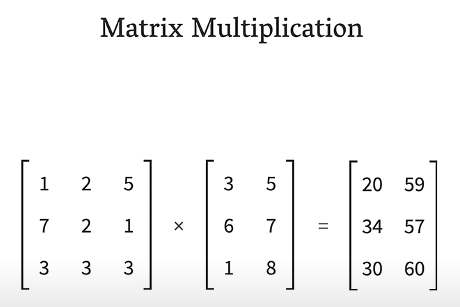

In [ ]:
t1 = tf.constant([[1, 2, 5],
                  [7, 2, 1],
                  [3, 3, 3]])
t2 = tf.constant([[3, 5],
                  [6, 7],
                  [1, 8]])
tf.matmul(t1, t2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[20, 59],
       [34, 57],
       [30, 60]], dtype=int32)>

In [ ]:
tensor * tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]], dtype=int32)>

In [ ]:
# Matrix multiplication with python operator "@"
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
# Create a (3, 2) tensor [which I already have]
t2
# Create another (3, 2) tensor
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])
t2, X

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[3, 5],
        [6, 7],
        [1, 8]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>)

In [ ]:
# Try to matrix multiply tensors of same shape
# X @ t2

We need to either:

* Reshape X to (2, 3) so it's (2, 3) @ (3, 2).
* Reshape Y to (3, 2) so it's (3, 2) @ (2, 3).

We can do this with either:

* tf.reshape() - allows us to reshape a tensor into a defined shape.
* tf.transpose() - switches the dimensions of a given tensor.

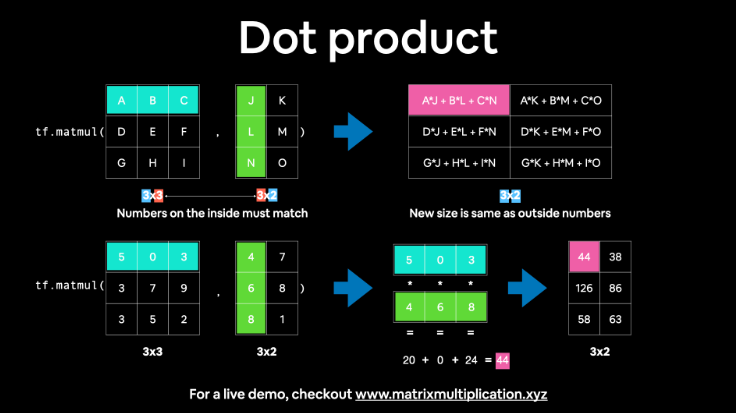

[tf.transpose](https://www.tensorflow.org/api_docs/python/tf/transpose?authuser=1)

[tf.replace](https://www.tensorflow.org/api_docs/python/tf/reshape)

In [ ]:
# transpose of t2
X @ tf.transpose(t2)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[13, 20, 17],
       [29, 46, 35],
       [45, 72, 53]], dtype=int32)>

In [ ]:
# transpose of X
tf.transpose(X) @ t2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[26, 66],
       [36, 86]], dtype=int32)>

In [ ]:
# Let's change shape of t2
tf.reshape(t2, shape=(2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[3, 5, 6],
       [7, 1, 8]], dtype=int32)>

In [ ]:
tf.matmul(X, tf.reshape(t2, shape=(2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[17,  7, 22],
       [37, 19, 50],
       [57, 31, 78]], dtype=int32)>

In [ ]:
# reshaping X
tf.matmul(tf.reshape(X, shape=(2, 3)), t2)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 18,  43],
       [ 48, 103]], dtype=int32)>

The main difference between transpose and reshape is that **transpose** is for *flipping the axis* and **reshaping** is for *reshuffling*.

The result of reshape and transpose is different because of the following

In [ ]:
X, tf.transpose(X), tf.reshape(X, shape=(2, 3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

**The dot product**

Multiplying matrices by eachother is also referred to as the dot product.

You can perform Matrix multiplication using:
* `tf.matmul()`
* `tf.tensordot()`
* `@`

🗝️**Note:** there is no direct method for renaming the tensor but to rename a tensor we can use `tf.identity()`

In [ ]:
# renaming t2 to Y
Y = tf.identity(t2, name= "Y")
Y

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[3, 5],
       [6, 7],
       [1, 8]], dtype=int32)>

In [ ]:
X

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [ ]:
# Perform the dot product of X and Y using tensordot (requires one of them to be transposed)
tf.tensordot(X, tf.transpose(Y), axes=1)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[13, 20, 17],
       [29, 46, 35],
       [45, 72, 53]], dtype=int32)>

[tf.tensordot](https://www.tensorflow.org/api_docs/python/tf/tensordot)

In [ ]:
# Check the values of Y, reshape Y and Transposed Y
print("Normal Y: ")
print(Y, "\n") # "\n" is for new line

print("Reshaped Y: ")
print(tf.reshape(Y, (2, 3)), "\n")

print("Transposed Y: ")
print(tf.transpose(Y))

Normal Y: 
tf.Tensor(
[[3 5]
 [6 7]
 [1 8]], shape=(3, 2), dtype=int32) 

Reshaped Y: 
tf.Tensor(
[[3 5 6]
 [7 1 8]], shape=(2, 3), dtype=int32) 

Transposed Y: 
tf.Tensor(
[[3 6 1]
 [5 7 8]], shape=(2, 3), dtype=int32)


🗝️**Note:** whenever performing a matrix multiplication and the shapes of two matrices don't line up, you will `transpose` (not reshape) one of them in order to line them up.

### Changing the datatype of a tensor

In [ ]:
# Create a new tensor with default datatype (float32)
B = tf.constant([1.7, 7.4])
B, B.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 tf.float32)

In [ ]:
C = tf.constant([7, 10])
C, C.dtype

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>,
 tf.int32)

> Mixed precision is the use of both 16-bit and 32-bit floating-point types in a model during training to make it run faster and use less memory.

> Today, most models use the float32 dtype, which takes 32 bits of memory. However, there are two lower-precision dtypes, float16 and bfloat16, each which take 16 bits of memory instead. Modern accelerators can run operations faster in the 16-bit dtypes, as they have specialized hardware to run 16-bit computations and 16-bit dtypes can be read from memory faster.

[Mixed-precision](https://www.tensorflow.org/guide/mixed_precision?authuser=1)

You can change the datatype of a tensor using `tf.cast()`.

In [ ]:
# Change from float32 to float16 (reduced precision)
D = tf.cast(B, dtype=tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [ ]:
# Change from int32 to float32
E = tf.cast(C, dtype=tf.float32)
E, E.dtype

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>,
 tf.float32)

In [ ]:
E_float16 = tf.cast(E, dtype=tf.float16)
E_float16

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([ 7., 10.], dtype=float16)>

### Aggregating tensors
Aggregating tensors = condensing them from multiple values down to a smaller amount of values.

In [ ]:
# Get the absolube value using tf.abs()
D = tf.constant([-7, -10])
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Aggregation methods typically have the syntax `reduce()_[action]`, such as:

* `tf.reduce_min()` - find the minimum value in a tensor.
* `tf.reduce_max()` - find the maximum value in a tensor (helpful for when you want to find the highest prediction probability).
* `tf.reduce_mean()` - find the mean of all elements in a tensor.
* `tf.reduce_sum()` - find the sum of all elements in a tensor.

🗝️**Note:** typically, each of these is under the `math` module, e.g. `tf.math.reduce_min(`) but you can use the alias `tf.reduce_min()`.

In [ ]:
# Creating a new tensor X
X = tf.constant([[10, 7],
                [7, 10]])
X

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
# min of X
tf.reduce_min(X)

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# max of X
tf.reduce_max(X)

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [ ]:
# sum of X
tf.reduce_sum(X)

<tf.Tensor: shape=(), dtype=int32, numpy=34>

In [ ]:
# mean of X
tf.reduce_mean(X)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [ ]:
# Create a random tensor with values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([59,  0, 43,  9,  9, 73, 77,  1, 27, 43, 67, 34, 60, 27, 83, 71, 92,
       66, 39, 36, 17, 17, 87, 98, 66, 99, 26, 20, 63, 28, 99, 20, 47, 89,
       74, 74, 66, 84, 10, 49, 36, 62,  3, 48, 62, 42,  7,  1, 96, 67])>

🛠️**Exercise:** With what we've just learned, find the variance and standard deviation of our `E` tensor using TensorFlow methods.

Variance: [link](https://www.tensorflow.org/api_docs/python/tf/math/reduce_variance?authuser=1)

In [ ]:
# Variance of E
tf.math.reduce_variance(tf.cast(E, dtype = tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=886.08844>

In [ ]:
# another method for variance
import tensorflow_probability as tfp
tfp.stats.variance(E)

<tf.Tensor: shape=(), dtype=int64, numpy=886>

In [ ]:
# Standard deviation of E
tf.math.reduce_std(tf.cast(E, dtype = tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=29.767239>

### Find the positional maximum and minimum

In [73]:
# Create a new tensor for finding positional minimum and maximum
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [74]:
# Find the positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [75]:
# Index on our largest value position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [76]:
# Find the max value of F
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

🗝️**Note:** `assert` can be used to check if the error exists or not

In [77]:
# Check for equality
assert F[tf.argmax(F)] == tf.reduce_max(F)

In [78]:
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [79]:
# finding the positional minimum
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [80]:
# Find the minimum using positional minimum index
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

### Squeezing a tensor (removing all single dimensions)

In [82]:
# Create a tensor to get started
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1, 1, 1, 1, 50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [83]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [84]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>,
 TensorShape([50]))

### One-hot encoding tensors
[one-hot-coding-theory](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)

If you have a tensor of indicies and would like to one-hot encode it, you can use `tf.one_hot()`.

You should also specify the `depth` parameter (the level which you want to one-hot encode to).

In [85]:
# Create a list of indices
some_list = [0, 1, 2, 3] # could be red, blue, green, purple

# One hot encode our list of indices
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [86]:
# Specify custom values for one hot encoding
tf.one_hot(some_list, depth=4, on_value="Yo I love DL", off_value="I love to eat")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'Yo I love DL', b'I love to eat', b'I love to eat',
        b'I love to eat'],
       [b'I love to eat', b'Yo I love DL', b'I love to eat',
        b'I love to eat'],
       [b'I love to eat', b'I love to eat', b'Yo I love DL',
        b'I love to eat'],
       [b'I love to eat', b'I love to eat', b'I love to eat',
        b'Yo I love DL']], dtype=object)>

### Squaring, log, square root
* `tf.square()` - get the square of every value in a tensor.
* `tf.sqrt()` - get the squareroot of every value in a tensor (**note:** the elements need to be floats or this will error).
* `tf.math.log()` - get the natural log of every value in a tensor (elements need to floats).

In [87]:
# Create a new tensor
H = tf.range(1, 10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [88]:
# Square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [91]:
# Square root (will require a non-int type)
tf.sqrt(tf.cast(H, dtype=tf.bfloat16))

<tf.Tensor: shape=(9,), dtype=bfloat16, numpy=
array([1, 1.41406, 1.73438, 2, 2.23438, 2.45312, 2.64062, 2.82812, 3],
      dtype=bfloat16)>

In [93]:
# finding log
tf.math.log(tf.cast(H, dtype=tf.bfloat16))

<tf.Tensor: shape=(9,), dtype=bfloat16, numpy=
array([0, 0.691406, 1.10156, 1.38281, 1.60938, 1.78906, 1.94531, 2.07812,
       2.20312], dtype=bfloat16)>

## Tensors and NumPy
TensorFlow interacts beautifully with NumPy arrays.

🔑 **Note:** One of the main differences between a TensorFlow tensor and a NumPy array is that a TensorFlow tensor can be run on a GPU or TPU (for faster numerical processing).

In [95]:
# Create a tensor directly from a NumPy array
I = tf.constant(np.array([3., 7., 10.]))
I

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [96]:
# Convert our tensor to numpy array
np.array(I), type(np.array(I))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [97]:
# Convert tensor I to NumPy array
I.numpy(), type(I.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [98]:
J = tf.constant([3.])
J.numpy()[0]

3.0

In [99]:
# The default types of each are slightly different
numpy_I = tf.constant(np.array([3., 7., 10.]))
tensor_I = tf.constant([[3., 7., 10.]])

# Check the datatypes of each
numpy_I.dtype, tensor_I.dtype

(tf.float64, tf.float32)

## Finding access to GPUs

In [100]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[]

In [101]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


> 🔑 **Note:** If you have access to a CUDA-enabled GPU, TensorFlow will automatically use it whenever possible.